In [3]:
import pandas as pd
import numpy as np

sentences = [
    "As spring unfolds, the warmth of the season encourages the first blossoms to open, signaling longer days ahead.",
    "Spring brings not only blooming flowers but also the anticipation of sunny days and outdoor activities.",
    "With the arrival of spring, people begin planning their summer vacations, eager to enjoy the seasonal warmth.",
    "The mild spring weather marks the transition from the cold winter to the inviting warmth of summer.",
    "During spring, families often start spending more time outdoors, enjoying the season's pleasant temperatures and the promise of summer fun.",
    "Summer continues the season's trend of growth and warmth, with gardens full of life and days filled with sunlight.",
    "The summer season is synonymous with outdoor adventures and enjoying the extended daylight hours that began in spring.",
    "As summer arrives, the warm weather invites a continuation of the outdoor activities that people began enjoying in spring.",
    "The transition into summer brings even warmer temperatures, allowing for beach visits and swimming, much awaited since the spring.",
    "Summer vacations are often planned as the days grow longer, a pattern that starts in the spring, culminating in peak summer leisure."
]

all_words = set()
for sentence in sentences:
    words = [word.strip(".,!?") for word in sentence.split()]
    all_words.update(words)

word_counts = {}
for word in all_words:
    word_counts[word] = []


for sentence in sentences:
    sentence_word_count = {word: sentence.split().count(word.strip(",.!?")) for word in all_words}
    for word, count in sentence_word_count.items():
        #print(count)
        #print(word)
        word_counts[word].append(count)

word_count_df = pd.DataFrame(word_counts)

word_count_df = word_count_df.fillna(0)
print(word_count_df)

from numpy.linalg import norm
def cosineSimilarity(vec1, vec2):
    V1 = np.array(vec1)
    V2 = np.array(vec2)
    cosine = np.dot(V1, V2)/(norm(V1)*norm(V2))
    return cosine

heatmap_matrix = []
for i in range(len(sentences)):
    similarity_row = []
    for j in range(len(sentences)):
        similarity = cosineSimilarity(word_count_df.iloc[i], word_count_df.iloc[j])
        similarity_row.append(similarity)
    heatmap_matrix.append(similarity_row)

heatmap_matrix_df = pd.DataFrame(heatmap_matrix, index=["st"+str(i+1) for i in range(len(sentences))], columns=["st"+str(i+1) for i in range(len(sentences))])

heatmap_matrix_df

   warmer  that  more  people  a  grow  weather  extended  marks  sunlight  \
0       0     0     0       0  0     0        0         0      0         0   
1       0     0     0       0  0     0        0         0      0         0   
2       0     0     0       1  0     0        0         0      0         0   
3       0     0     0       0  0     0        1         0      1         0   
4       0     0     1       0  0     0        0         0      0         0   
5       0     0     0       0  0     0        0         0      0         0   
6       0     1     0       0  0     0        0         1      0         0   
7       0     1     0       1  1     0        1         0      0         0   
8       1     0     0       0  0     0        0         0      0         0   
9       0     1     0       0  1     1        0         0      0         0   

   ...  to  signaling  days  blooming  culminating  flowers  awaited  summer  \
0  ...   1          1     1         0            0        0  

,st1,st2,st3,st4,st5,st6,st7,st8,st9,st10
st1,1.000000,0.281718,0.436436,0.604815,0.350438,0.273009,0.211702,0.400501,0.163663,0.318511
st2,0.281718,1.000000,0.193649,0.220193,0.236940,0.323029,0.187867,0.236940,0.193649,0.161515
st3,0.436436,0.193649,1.000000,0.426401,0.344124,0.208514,0.181902,0.401478,0.187500,0.260643
st4,0.604815,0.220193,0.426401,1.000000,0.342381,0.222277,0.206835,0.391293,0.266501,0.266733
st5,0.350438,0.236940,0.344124,0.342381,1.000000,0.334855,0.278207,0.368421,0.229416,0.287019
st6,0.273009,0.323029,0.208514,0.222277,0.334855,1.000000,0.252861,0.191346,0.156386,0.173913
st7,0.211702,0.187867,0.181902,0.206835,0.278207,0.252861,1.000000,0.445132,0.242536,0.303433
st8,0.400501,0.236940,0.401478,0.391293,0.368421,0.191346,0.445132,1.000000,0.172062,0.430528
st9,0.163663,0.193649,0.187500,0.266501,0.229416,0.156386,0.242536,0.172062,1.000000,0.156386
st10,0.318511,0.161515,0.260643,0.266733,0.287019,0.173913,0.303433,0.430528,0.156386,1.000000


<Axes: >

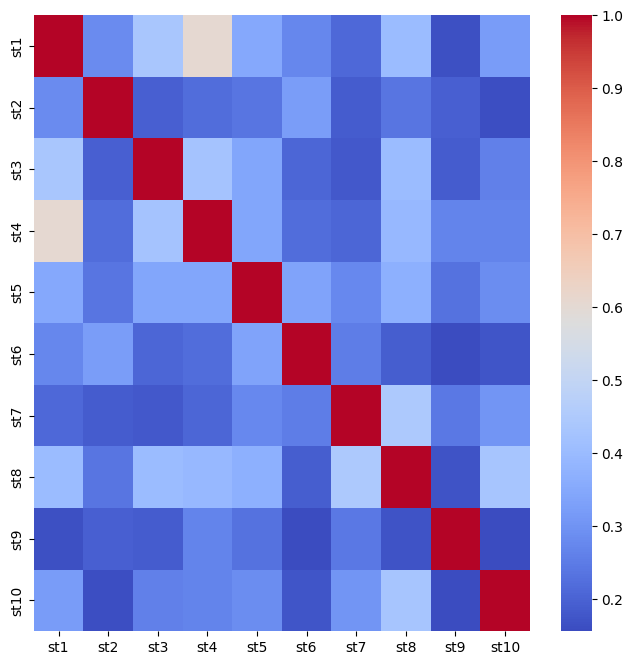

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (8, 8))
sns.heatmap(heatmap_matrix_df, cmap='coolwarm', fmt=".2f")